In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from iminuit import Minuit

In [3]:
sns.set_style("darkgrid", {"grid.color": "0", "grid.linestyle": ":"})
plt.rcParams['image.cmap'] = 'hsv'
plt.rcParams['font.size'] = 15

In [4]:
cores = np.array([1,2,4,8,16,32,64])
time = np.array([0.8386,0.9245,1.023,1.288,1.586,2.676,4.8])

In [5]:
time/time[0]

array([1.        , 1.10243263, 1.21989029, 1.53589316, 1.89124732,
       3.19103267, 5.72382542])

In [6]:
fft = np.array([0.08009,0.1453,0.2298,0.3364,0.607,1.654,3.703])

In [7]:
time -= fft

In [8]:
def gus(x,p):
    return 1-p+p*x

In [9]:
def chi2(func, x, y, stderr, *args):
    return np.sum((y-func(x,*args))**2/stderr**2)

In [10]:
chi = lambda p: chi2(gus, cores, time[0]*cores/time, 1, p)
ll = Minuit(chi,p=0.5)
ll.limits = [(0,1)]
ll.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 3.438                      │              Nfcn = 17               │
│ EDM = 1.36e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ p    │   0.700   │   0.014   │            │            │    0    │    1    │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬──────────┐
│   │        p │
├───┼──────────┤
│ p │ 0.000192 │
└───┴──────────┘

In [11]:
times = np.array([0.8272,0.952,1.169,1.609,2.331,3.795,6.779])

In [12]:
fft2 = np.array([0.06918,0.1427,0.2985,0.6155,1.288,2.709,5.619])

In [13]:
times -= fft2

In [14]:
chi = lambda p: chi2(gus, cores, times[0]*cores/times, 1, p)
ll = Minuit(chi,p=0.5)
ll.limits = [(0,1)]
ll.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 2.401                      │              Nfcn = 17               │
│ EDM = 4.41e-08 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ p    │   0.659   │   0.014   │            │            │    0    │    1    │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬──────────┐
│   │        p │
├───┼──────────┤
│ p │ 0.000192 │
└───┴──────────┘

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


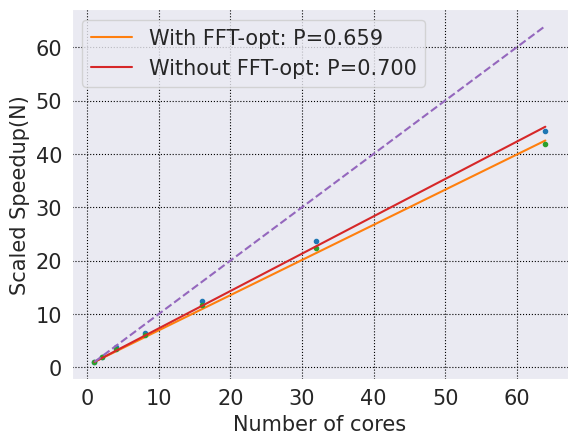

In [15]:
plt.plot(cores,time[0]*cores/time,'.')
plt.plot(cores,gus(cores,0.659),'-',label="With FFT-opt: P=0.659")
plt.plot(cores,times[0]*cores/times,'.')
plt.plot(cores,gus(cores,0.700),'-',label="Without FFT-opt: P=0.700")
plt.xlabel("Number of cores")
plt.ylabel("Scaled Speedup(N)")
plt.plot(cores,cores,'--')
plt.legend()
plt.savefig('weakscaling.eps')